기한: 4월 2일 (월) 18시 30분

과제: 아래 캐글 실습 내용을 필사하여, 깃허브에 업로드한 뒤, 깃허브 링크를 댓글로 달아주세요.

​https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap/notebook

<a id='Top'></a>
<center>
    <h1><u><b>Mall Customers Segmentation</b></u></h1>
<h3>Author: Robert Kwiatkowski</h3>
</center>

---

This project shows how to perform a mall customers segmentation using Machine Learning algorithms. This is the unsupervised clustering problem and three popular algorithms will be presented and compared: KMeans, Affinity Propagation and DBSCAN. There will be some further discussions about these algorithms alterations and their current state of developments/research. The main aim of this notebook is to cover the basics of clustering methods and touch some more advanced aspects as well.

The notebook is divided into six main sections. At the end of the notebook, you will find also references I used during the preparation of this notebook. In order to increase readability some code is hidded (so, please unhide them to see the code).

### SECTIONS:  
1. [Introduction](#Intro)<br>  
2. [Reading Data](#Reading_data)<br>  
3. [Exploratory Data Analysis](#Exploratory_Data_Analysis)<br>
   3.1 [Distributions](#Distributions)<br>
   3.2 [Correlations](#Correlations)<br>
4. [Clustering](#Clustering)<br>
   4.1 [K-Means](#K-Means)<br>
   &nbsp;&nbsp;&nbsp;&nbsp; 4.1.1 [Description](#K-Means_description)<br>
   &nbsp;&nbsp;&nbsp;&nbsp; 4.1.2 [Use case - customers segmentation](#K-Means_use_case)<br>
   4.2 [DBSCAN](#DBSCAN)<br>
   &nbsp;&nbsp;&nbsp;&nbsp; 4.2.1 [Description](#DBSCAN_description)<br>
   &nbsp;&nbsp;&nbsp;&nbsp; 4.2.2 [Use case - customers segmentation](#DBSCAN_use_case)<br>
   4.3 [Affinity Propagation](#AF)<br>
   &nbsp;&nbsp;&nbsp;&nbsp; 4.3.1 [Description](#AF_description)<br>
   &nbsp;&nbsp;&nbsp;&nbsp; 4.3.2 [Use case - customers segmentation](#AF_use_case)<br> 
5. [Comparison and discussion](#Comparison_and_discussion)<br>
6. [References](#References)<br>

<a id='Intro'></a>
## 1. Introduction  <a href='#Top' style="text-decoration: none;">^</a><br>



군집화가 도움 되는 곳 :
* customers segmentation (for efficient marketing)
* image segmentation 
* documents clusterisation.

많은 군집화 알고리즘이 있지만 크게 두 가지로 나뉜다; hierarchical and partitional.

이 두 알고리즘의 가장 큰 차이점은 군집의 개수 (k)의 사전 설정 유무이다.

* <u>Hierarchical</u> algorithms recursively split a dataset into a smaller subset until a subset contains only one item. This can be represented with a dendrogram which looks like a tree. It can be constructed from leaves to the roo(agglomerative approach) or from the root down to the leaves (divisive approach). In hierarchical clustering, you don’t have to specify the number of clusters but you have to define a termination condition for splitting/merging process. </li>     

* <u>Partitional</u> algorithms divide a dataset into several subsets (clusters) based on a given criteria. For some algorithms number of clusters has to be defined a priori (e.g K-Means) and for some not (DBSCAN). Defining the number of clusters before running an algorithm often requires a specific domain knowledge which is often challenging (or even impossible) in many applications. This led to the development of many heuristics and simplified approaches helping analyst without domain knowledge to choose the appropriate number of clusters.</li>

현재는 수많은 군집화 알고리즘이 있고, 어떤 것도 다른 것을 크게 능가하지 않는다. 오로지 데이터 그 자체, 적용 분야나 클라이언트의 요구에 의해서 결정된다. 여기서는 3가지 partitional algorithms을 사용할 것이다. K-means, DBSCAN, Affinity Propagation. 모두 Scikit-Learn에서 사용 가능하다.

<a id='Reading_data'></a>
## 2. Reading data <a href='#Top' style="text-decoration: none;">^</a><br>

In this section, raw data will be read, overviewed and checked if any cleaning is required.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.4.2
numpy version: 1.24.4
seaborn version: 0.12.2


In [8]:
mall_data = pd.read_csv('./data/Mall_Customers.csv')

print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset.


In [9]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
12,13,Female,58,20,15
78,79,Female,23,54,52
70,71,Male,70,49,55
151,152,Male,39,78,88
67,68,Female,68,48,48
28,29,Female,40,29,31
91,92,Male,18,59,41
121,122,Female,38,67,40
31,32,Female,21,30,73
83,84,Female,46,54,44


In [10]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


There are 5 columns:
* `Customer ID` - numerical - unique customer number - integer
* `Gender` - categorical - binary (Male/Female)
* `Age` - numerical - integer
* `Annual Income (k$)` - numerical - integer
* `Spending Score (1-100)` - numerical - integer

'gender'변수는 binary, categorical이다. 아마 원핫 인코딩을 하고 싶을 것이다.
* technically possible
* theoretically not forbidden
* practically not recommended

하지만 원핫 인코딩은 권장되지 않는다. 다음 사이트 참고. [IBM support site](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided).

In [11]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

결측치는 없어 분석이 간단해지지만 이런 경우는 실제에선 거의 없다.

<a id='Exploratory_Data_Analysis'></a>
## 3. Exploratory Data Analysis<a href='#Top' style="text-decoration: none;">^</a><br>

<a id='Distributions'></a>
### 3.1 Distributions <a href='#Top' style="text-decoration: none;">^</a><br>

수치형 변수의 분포를 자세히 알아보자. 데이터는 유일한 범주형 변수인 gender에 의해 계층화 되어있을 것이다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28424\1603667923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28424\1603667923.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.c

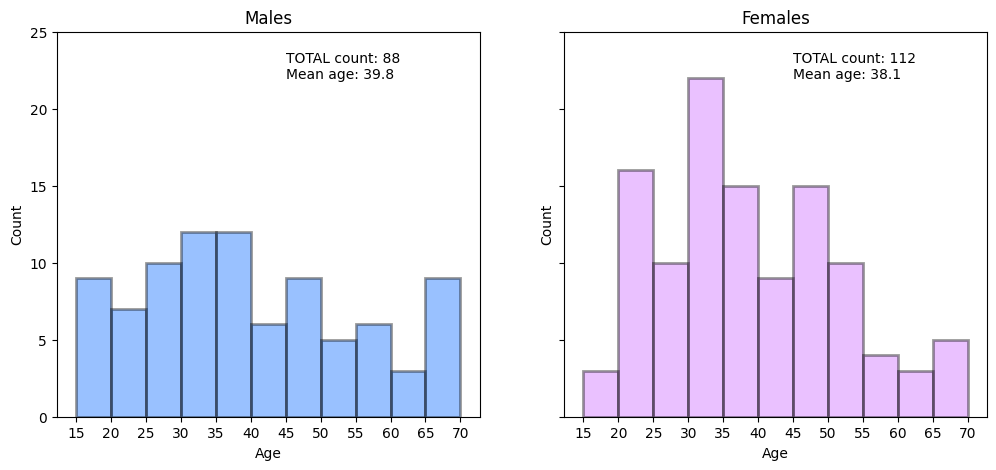

In [13]:
males_age = mall_data[mall_data['Gender']=='Male']['Age'] # subset with males age
females_age = mall_data[mall_data['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

In [14]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


- 남성 고객의 나이가 여성 고객보다 약간 높다.
- 남성 고객의 분포는 여성 고객의 분포보다 더 균일하다.
- 30-35세 고객이 많은 것을 확인할 수 있다.
- Kolgomorov-Smirnov test가 두 그룹간의 차이는 통계적으로 유의미하지 않음을 보여준다.

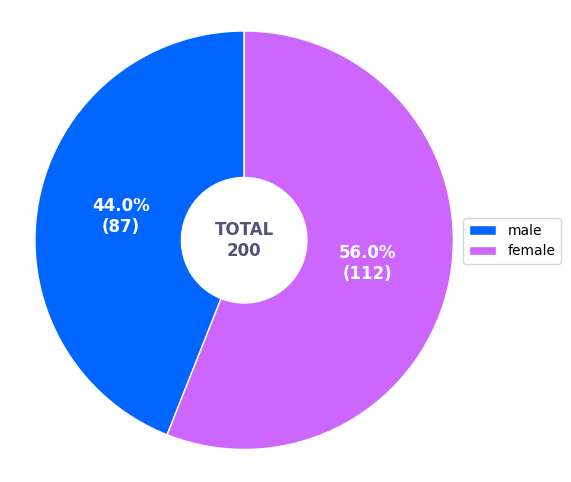

In [15]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(mall_data['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

여성 고객이 남성 고객보다 약간 더 많다(112 vs. 87). 여성 고객은 56%이다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28424\1925565421.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28424\1925565421.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github

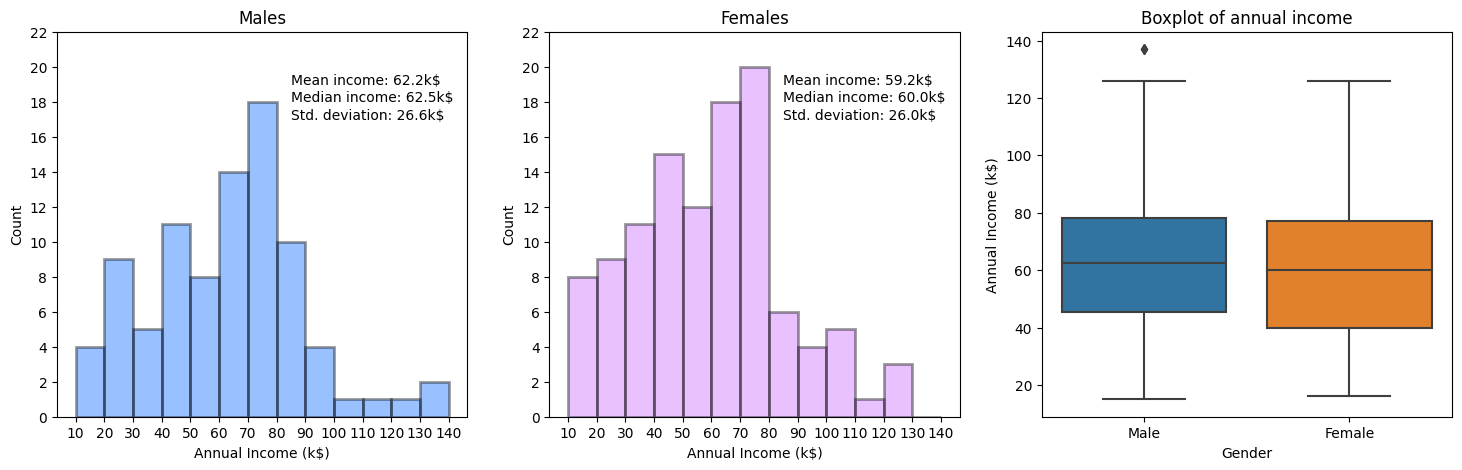

In [16]:
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

In [17]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


남성 고객의 소득이 여성 고객보다 높다 (62.2 k\\$ vs. 59.2k\\$). 또한 남성 고객의 중앙값이 여성 고객보다 높다.(62.5k\\$ vs. 60k\\$). 표준편차는 비슷하다. 남성 고객에서 연소득이 140k\\$인 고객을 이상치로 처리한다. K-S test는 두 그룹이 통계적으로 다르지 않음을 보여준다

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28424\3959129858.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28424\3959129858.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gis

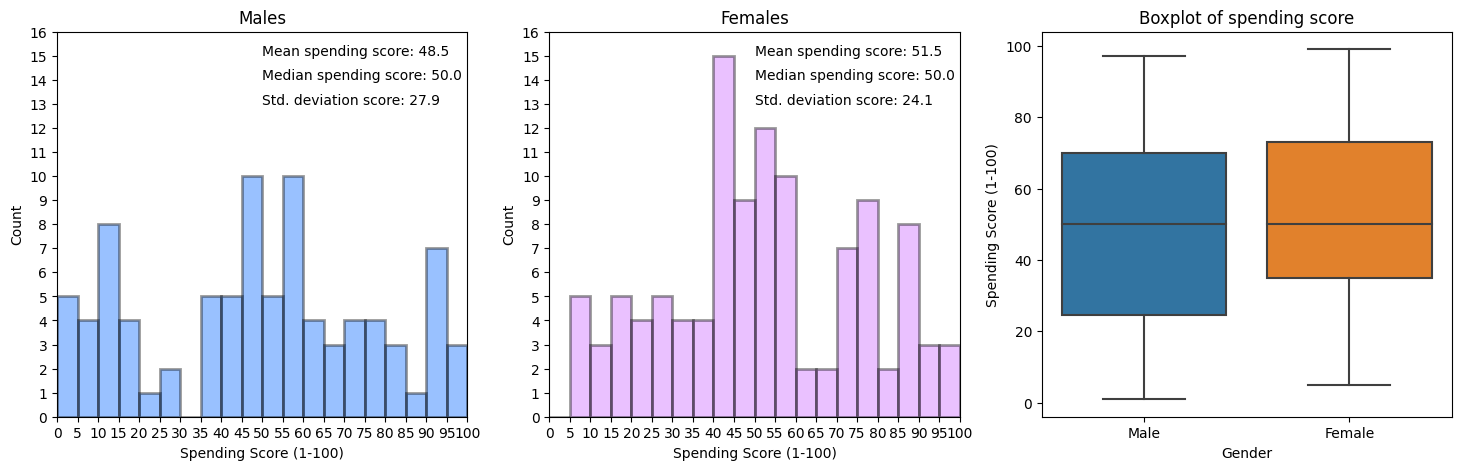

In [18]:
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)'] # subset with males age
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)'] # subset with females age

spending_bins = range(0,105,5)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

In [19]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


여성의 평균 소비가 남성보다 많다.

In [20]:
medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

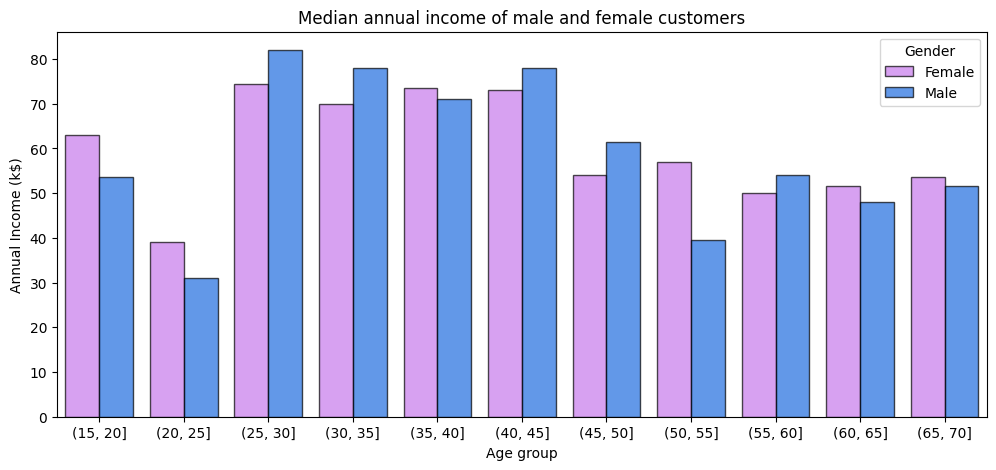

In [21]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

bar chart를 보면 대부분의 고객 연령이 25-45 사이이다. 여성과 남성 고객간의 가장 큰 차이는 25-30세 사이, 50-55세 사이에서 두드러진다. 

<a id='Correlations'></a>
### 3.2 Correlations<a href='#Top' style="text-decoration: none;">^</a><br>
수치형 변수들간의 상관관계를 살펴보자.

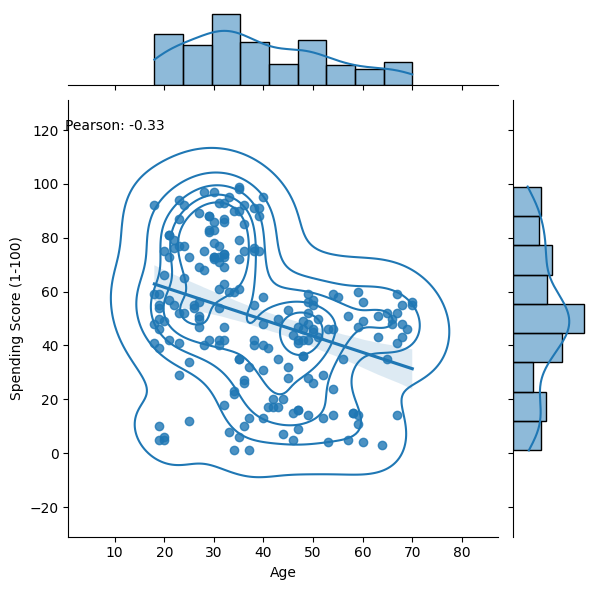

In [24]:
from scipy.stats import pearsonr

# calculating Pearson's correlation
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

jp = (sns.jointplot(x = 'Age', y = 'Spending Score (1-100)', data = mall_data,
                    kind = 'reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

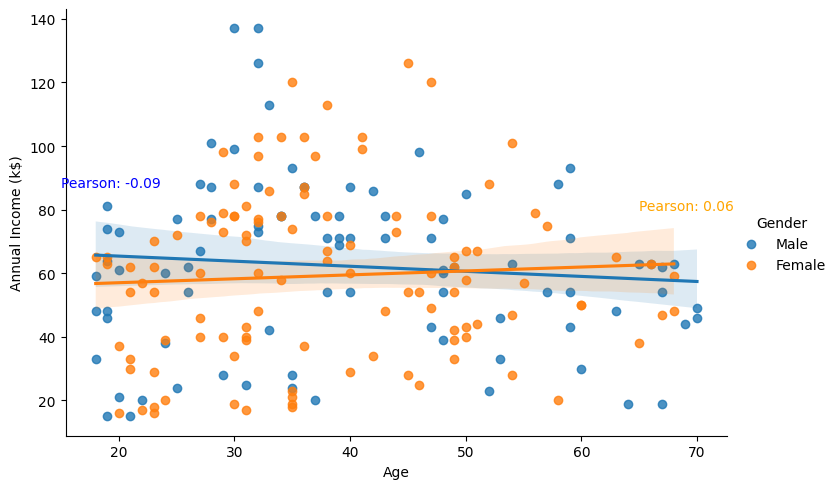

In [25]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(x = 'Age', y = 'Annual Income (k$)', data = mall_data, hue = 'Gender',
          aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

성별과 연소득간의 상관관계는 무시해도 되는 수준이다.

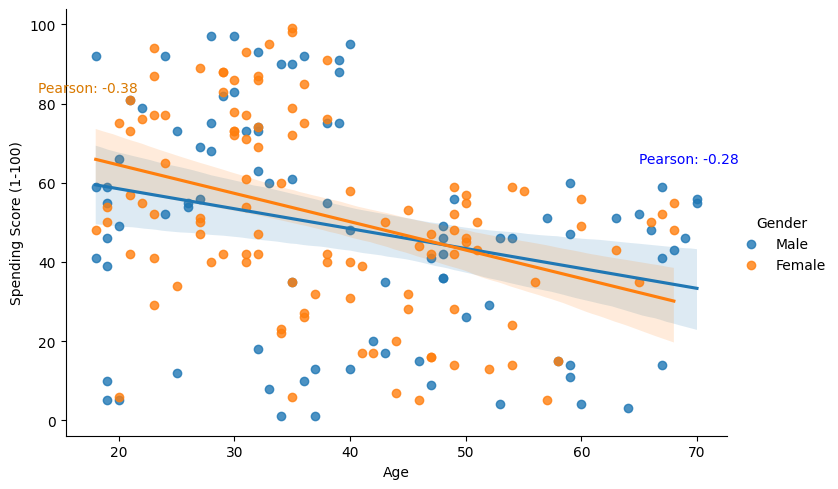

In [26]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x = 'Age', y =  'Spending Score (1-100)', data = mall_data, hue = 'Gender',
          aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

남여 성별 모두에서 소비량과 약한 음의 상관관계(<0.5)를 갖는다.

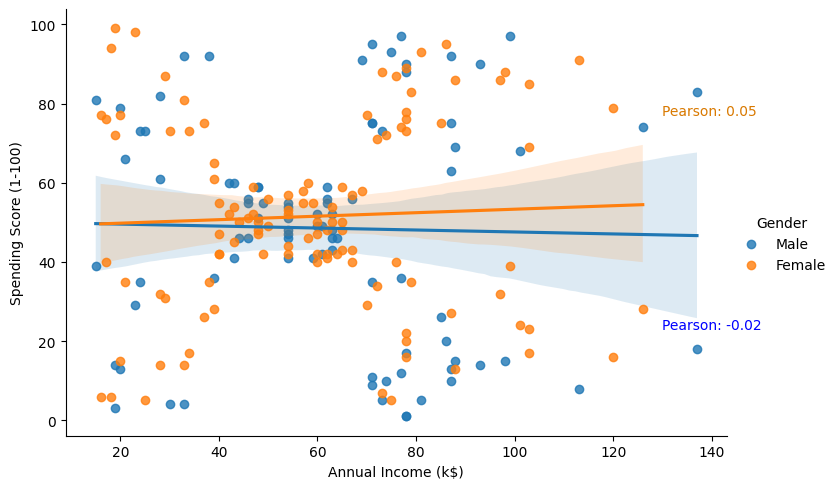

In [27]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall_data, hue = 'Gender',
          aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

남여 성별 모두에서 소비량과의 상관관계는 무시해도 되는 수준이다

-------------

<a id='Clustering'></a>
## 4. Clustering<a href='#Top' style="text-decoration: none;">^</a><br>  

다음 세 가지 군집화 알고리즘에 대해 군집화를 실시한다.
* K-Means
* Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
* Affinity Propagation.

다음 사이트를 참고하면 좋다. [here on Data Science Stack Exchange](https://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering).

---------------
<a id='K-Means'></a>
### 4.1 K-Means<a href='#Top' style="text-decoration: none;">^</a><br>  
다음 두 단계로 나뉜다.
1. description of the algorithm 
2. use case (mall customers segmentation).

<a id='K-Means_description'></a>
### 4.1.1 Description<a href='#Top' style="text-decoration: none;">^</a><br>  

K-Means의 3가지 주요 단계를 알아보자. (Lloyd’s algorithm)

<ol>
    <li>Split samples into initial groups by using seed points. The nearest samples to these seed point will create initial clusters.</li>
    <li>Calculate samples distances to groups’ central points (centroids) and assign the nearest samples to their cluster.</li>
    <li>The third step is to calculate newly created (updated) cluster centroids.</li>
</ol>
알고리즘이 수렴할 때까지 2번과 3번을 반복한다.<br>  

K-Means의 목표는 objective function (inertia)를 최소화하는 것이다. 함수는 다음과 같다.

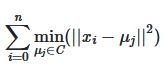

일반적으로 K-Means 알고리즘을 사용할 때 다음 세 가지 파라미터를 설정해주어야 한다.<br>  

1. **Initialisation criteria**  
    In scikit-learn, a clever initialisation scheme is implemented: “k-means++” proposed by Arthur and Vassilvitskii. It creates initial centroids generally distant from each other increasing probability of obtaining better results. There is also a possibility to use a random point’s generator. There are ongoing efforts to create the most efficient seeding method for K-Means algorithm, one of them is based on Independent Component Analysis and you can read more about it [here](http://www.ymd.nii.ac.jp/lab/publication/conference/2010/IWI-Onoda-2010.pdf).

2. **Number of clusters**  
    Selecting a number of clusters is the most challenging part of setting this algorithm. There are no hard mathematical criteria for this and many heuristic/simplified approaches have been developed. One of the simplest and the most popular one is the elbow method shown in this analysis. Additionaly a silhouette score will be used as well. 
    There are also other, often advanced, options for choosing the optimal number of clusters (however, not used in this notebook and not implemented in sklearn), e.g.:
    

* Minimum Message Length (MML) - [more](https://en.wikipedia.org/wiki/Minimum_message_length)
* Minimum Description Length (MDL) - [more](https://en.wikipedia.org/wiki/Minimum_description_length)
* Bayes Information Criterion (BIC) - [more](https://en.wikipedia.org/wiki/Bayesian_information_criterion)
* Akaike Information Criterion (AIC) - [more](https://en.wikipedia.org/wiki/Akaike_information_criterion)
* Dirichlet Process
* Gap statistics


3. **A distance metric (not required in scikit learn implementation)**  
    There are various options to calculate the distance between points. The most popular one is simply the Euclidean metric and it is the one implemented in scikit-learn. It is often called spherical k-means model. It has a drawback that it finds spherical-like groups only and tends to become inflated in highly multi-dimensional analyses (“curse of dimensionality”). There are other options but not implemented in scikit-learn, e.g.:
    
    
* Mahalonobis distance (high computiational cost)
* Itakura-Saito distance
* L1 distance
* Cosine distance
* Bregman distance


<a id='K-Means_use_case'></a>
### 4.1.2 Use case - customers segmentation<a href='#Top' style="text-decoration: none;">^</a><br>  

In [28]:
from sklearn.cluster import KMeans 

군집화에는 수치형 변수들만 사용되기 때문에, 범주형 변수인 'gender'는 여기서 사용되지 않는다.

In [29]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

적절한 군집의 개수(k)를 찾기 위하여, elbow 방법을 사용하자. 여기선, 2부터 10까지의 군집 수에 대한 inertia를 계산한다.

C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default valu

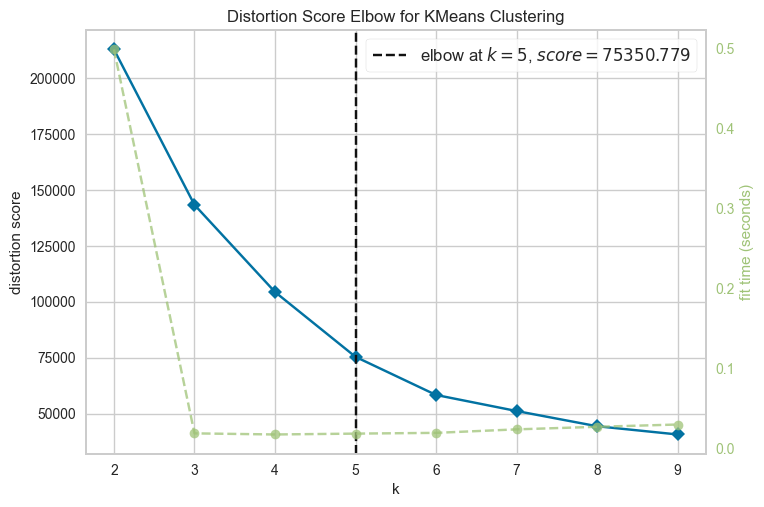

In [31]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

distortion score의 감소가 보이긴 하지만, 확실한 elbow는 보이지 않는다. 알고리즘은 5를 제안한다. 5나 6을 선택하는 것이 좋아 보인다.

또 다른 방법으로는 실루엣 스코어를 확인할 수 있다.

C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default valu

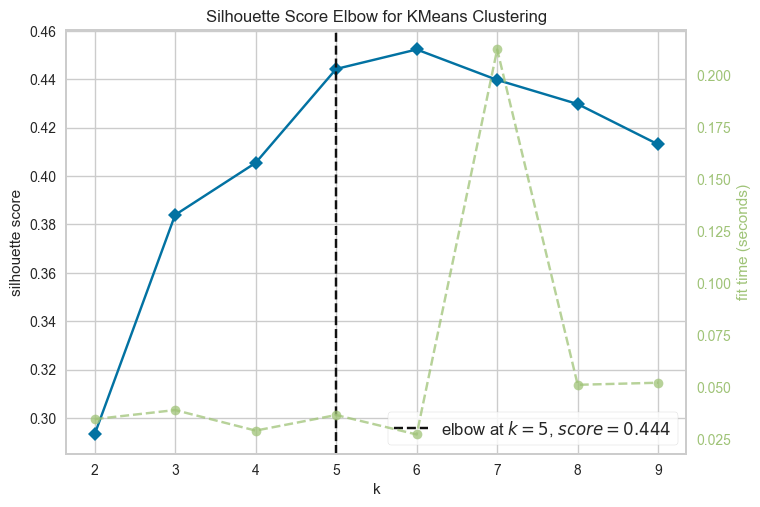

In [32]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

실루엣 스코어는 5나 6이 좋다고 제안한다. 둘을 비교해보자.

<u>**5 CLUSTERS**</u>

In [33]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


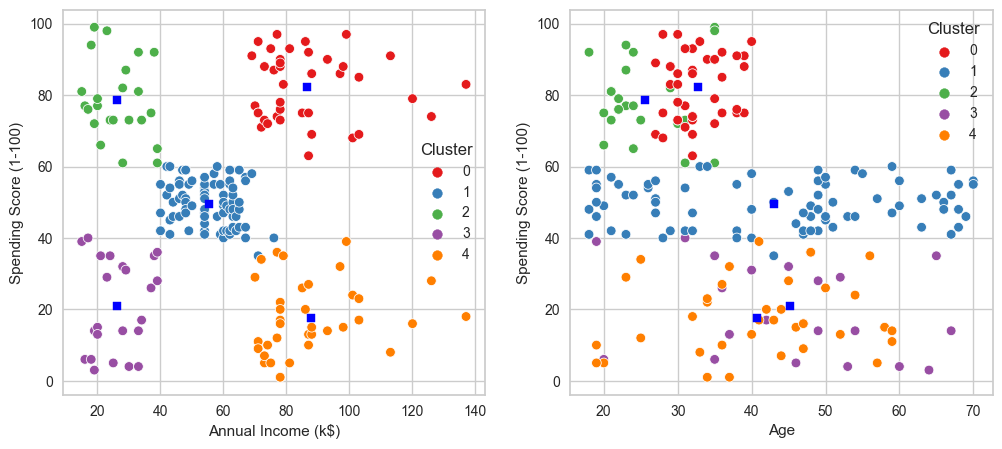

In [35]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
hue='Cluster', palette='Set1', ax=axes[1], legend='full')


axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

K-Means 알고리즘은 다음 다섯 개의 군집을 만들었다.
* clients with **low** annual income and **high** spending score
* clients with **medium** annual income and **medium** spending score
* clients with **high** annual income and **low** spending score
* clients with **high** annual income and **high** spending score
* clients with **low** annual income and **low** spending score

고객의 나이에 대해서는 뚜렷한 그룹이 만들어지지 않았다.

군집별 사이즈는 다음과 같다.

In [36]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,39
1,79
2,23
3,23
4,36


가장 큰 군집은 1번으로, 79개의 관측치가 있다. 3번 군집과 0번 군집은 23명으로 가장 작다. 다음 3D 투영도를 보고 5개 군집을 살펴보자. 돌려가며 보면 더 좋다.

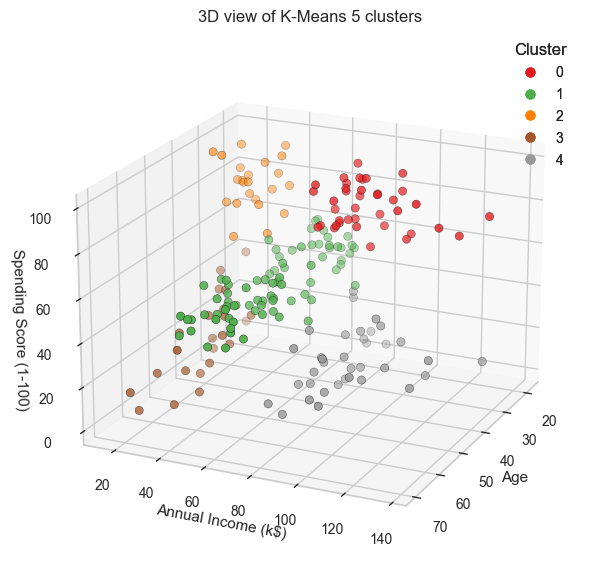

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d', elev=20, azim=210)
scatter = ax.scatter(KM5_clustered['Age'],
KM5_clustered['Annual Income (k$)'],
KM5_clustered['Spending Score (1-100)'],
c=KM5_clustered['Cluster'],
s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.azim = 25

# Create a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax.add_artist(legend)

plt.show()


Below a Plotly version:

In [38]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

Silhuette plot도 살펴보자

C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



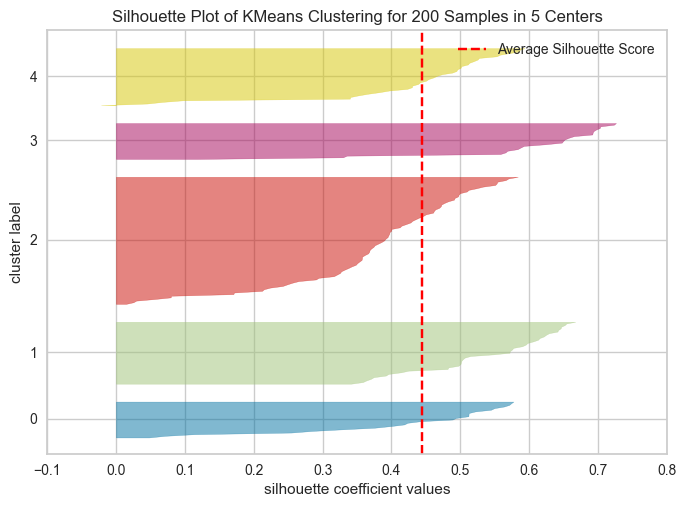

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

<u>**6 CLUSTERS**</u>

In [40]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



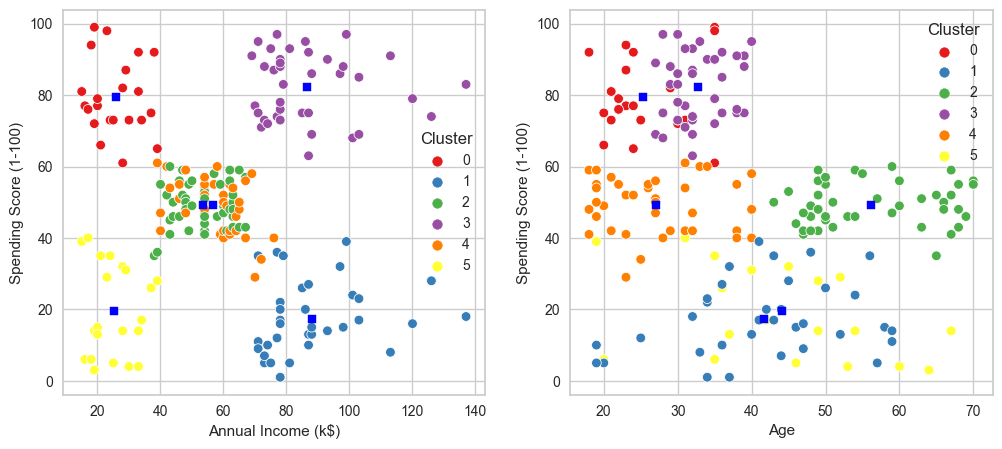

In [42]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM6_clustered,
hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM6_clustered,
hue='Cluster', palette='Set1', ax=axes[1], legend='full')


# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

K-Means 알고리즘으로 6개의 군집을 만들었을 때는 다음과 같다.
<ol start="0">
    <li>younger clients with **medium** annual and **medium** spending score</li>
    <li>clients with **high** annual income and **low** spending score</li>
    <li>younger clients with **medium** annual and **medium** spending score</li>
    <li>clients with **high** annual income and **high** spending score</li>
    <li>clients with **low** annual income and **low** spending score</li>
    <li>clients with **low** annual income and **high** spending score</li>
</ol>

고객의 나이에 대해선 뚜렷한 군집이 없다.

In [43]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,22
1,35
2,45
3,39
4,38
5,21


In [44]:
# Plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



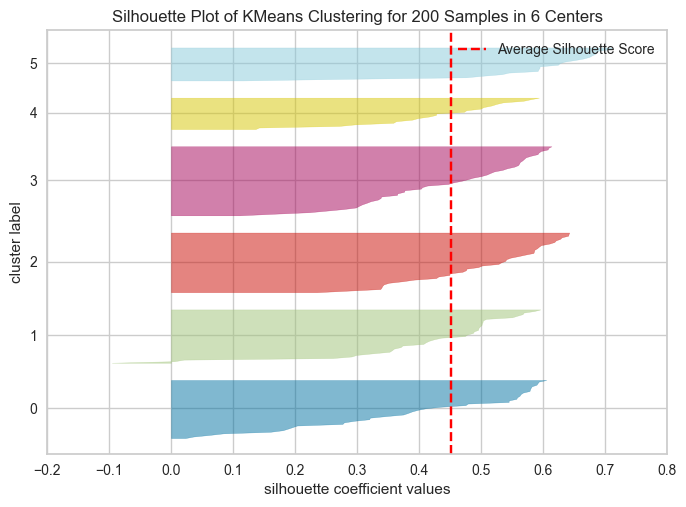

In [45]:
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

-----

<a id='DBSCAN'></a>
### 4.2 DBSCAN<a href='#Top' style="text-decoration: none;">^</a><br>  


<a id='DBSCAN description'></a>
### 4.2.1 Description<a href='#Top' style="text-decoration: none;">^</a><br>  

DBSCAN에는 다음 두 가지 파라미터가 필요하다.
* Eps, ε  - distance
* MinPts – Minimum number of points within distance Eps  

DBSCAN의 장점 :
* it finds number of clusters itself, based on eps and MinPts parameters 
* It it able to differentiate elongated clusters or clusters surrounded by other clusters in contrary to e.g. K-Means where clusters are always convex. 
* It is also able to find points not fitting into any cluster – it detects outliers.  

DBSCAN의 단점 : 
* High computational expense of average O(n log(n)) coming from a need to execute a neighbourhood query for each point.
* Poorly identifies clusters with various densities


<a id='DBSCAN use case'></a>
### 4.2.2 Use case - customers segmentation<a href='#Top' style="text-decoration: none;">^</a><br>  

In [46]:
from sklearn.cluster import DBSCAN

In DBSCAN there are two major hyperparameters:
* `eps`
* `min_samples`

두 파라미터에 대해 여러 리스트를 만들어 두 파라미터의 조합에 따른 DBSCAN의 결과를 살펴보자.

In [47]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

두 파라미터의 조합에 따라 DBSCAN이 만들어내는 군집 수가 다르다.

In [48]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

다음 heatplot으로 각 파라미터 조합에 따라 DBSCAN이 만들어낸 군집 수를 살펴보자.

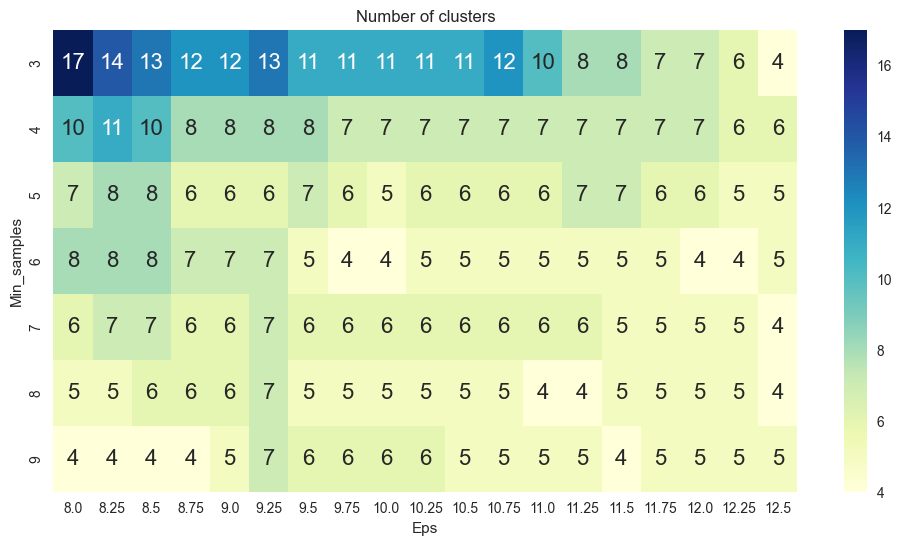

In [49]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

4부터 17까지 여러 군집 수가 주어졌다. 그래도 대체로 4-7이 많아보인다.
실루엣 스코어와 heatmap으로 어느 조합이 가장 좋을지 알아보자.

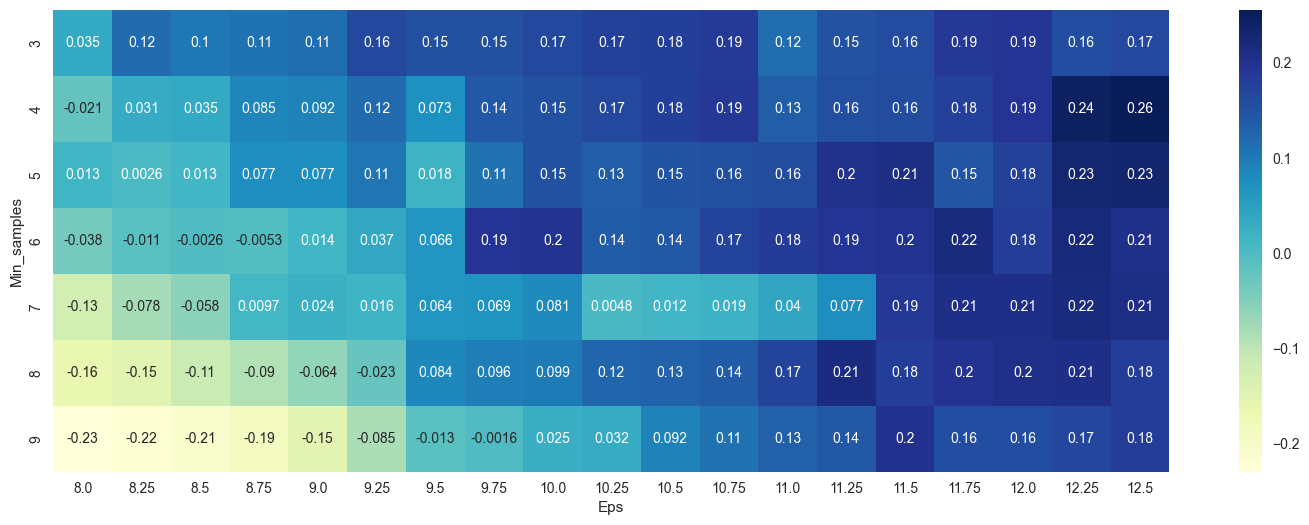

In [50]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.26 for `eps`=12.5 and `min_samples`=4.

In [51]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

Checking sizes of clusters.

In [52]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


0-4까지의 5개의 군집과 이상치 군집(-1)을 만들었다. 군집별 크기는 매우 다르다. 

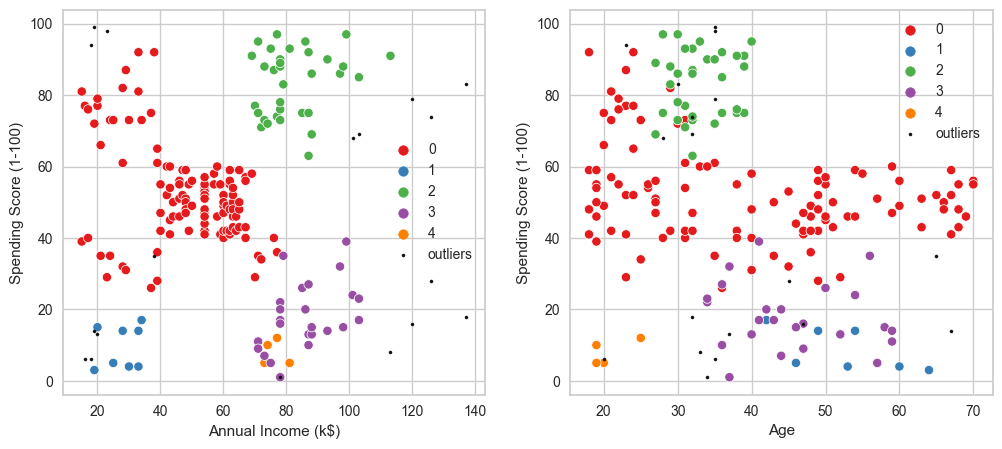

In [53]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
    data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
    hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
    data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
    hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)


axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

The graph above shows that there are some outliers - these points do not meet distance and minimum samples requirements to be recognised as a cluster.

<a id='AF'></a>
### 4.3 Affinity Propagation<a href='#Top' style="text-decoration: none;">^</a><br>  



<a id='AF description'></a>
### 4.3.1 Description<a href='#Top' style="text-decoration: none;">^</a><br>  
    
다음 두 가지 파라미터를 설정해야한다.
* **Preference** : a negative number that controls how many exemplars are used
* **Damping factor** : prevents numerical oscillations when updating messages

<a id='AF use case'></a>
### 4.3.2 Use case - customers segmentation<a href='#Top' style="text-decoration: none;">^</a><br> 

In [54]:
from sklearn.cluster import AffinityPropagation

In [55]:
no_of_clusters = []
preferences = range(-20000,-5000,100) # arbitraty chosen range
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(X_numerics, AF.labels_))
    
af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning:

Affinity propagation did not converge, this model may return degenerate cluster centers and labels.



,preference,clusters,sil_score
82,-11800.0,6.0,0.451649
27,-17300.0,6.0,0.451491
51,-14900.0,6.0,0.451491
52,-14800.0,6.0,0.451440
28,-17200.0,6.0,0.451440


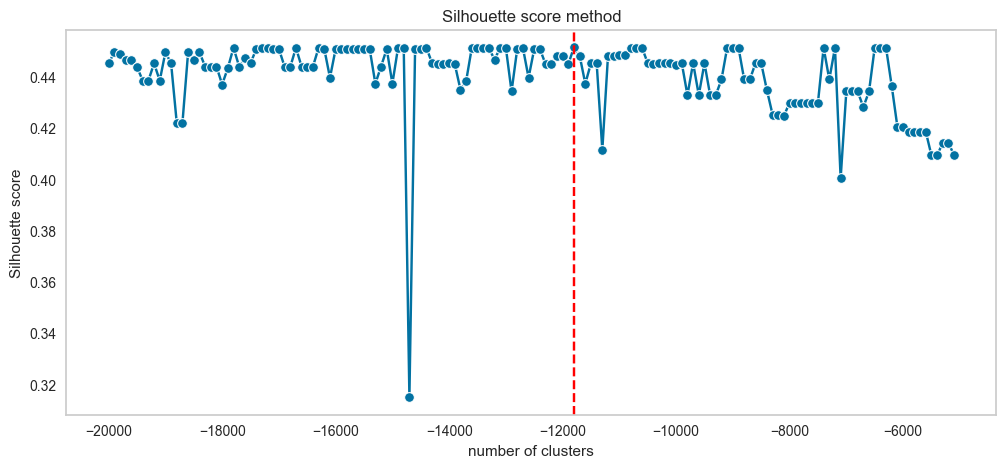

In [57]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x = preferences, y = af_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls="--", c="red")
plt.grid()
plt.show()

In [58]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)

In [59]:
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points

In [60]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


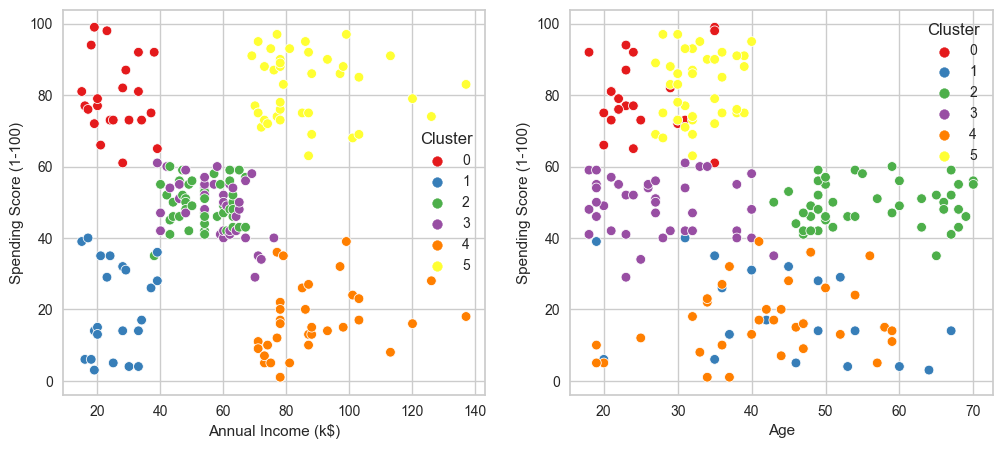

In [63]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=AF_clustered,
                        hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=AF_clustered,
                        hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')



plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

군집별 관측치 수가 대체로 고르다.

<a id='Comparison and discussion'></a>
## 5. Comparison and discussion <a href='#Top' style="text-decoration: none;">^</a><br> 

이전까지의 3가지 알고리즘들을 비교해보자.

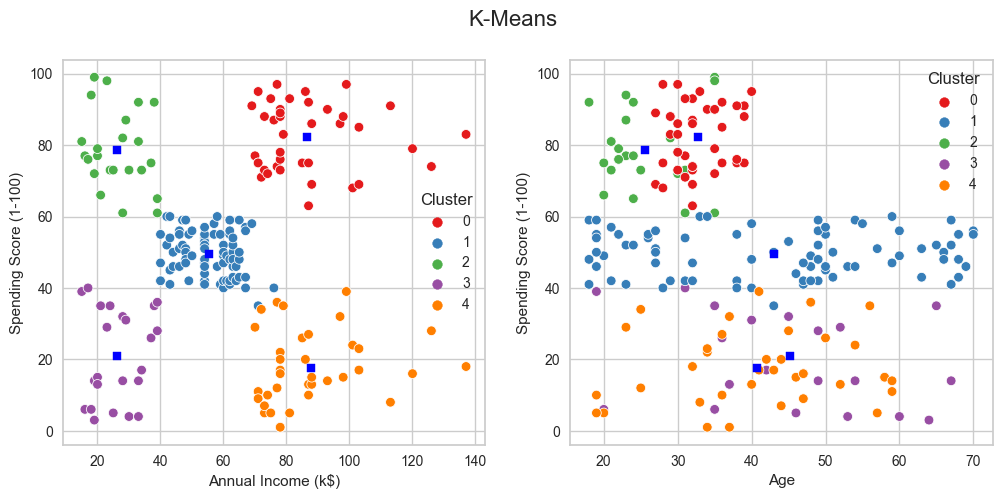

In [65]:
fig1.suptitle('K-Means', fontsize=16)
fig1

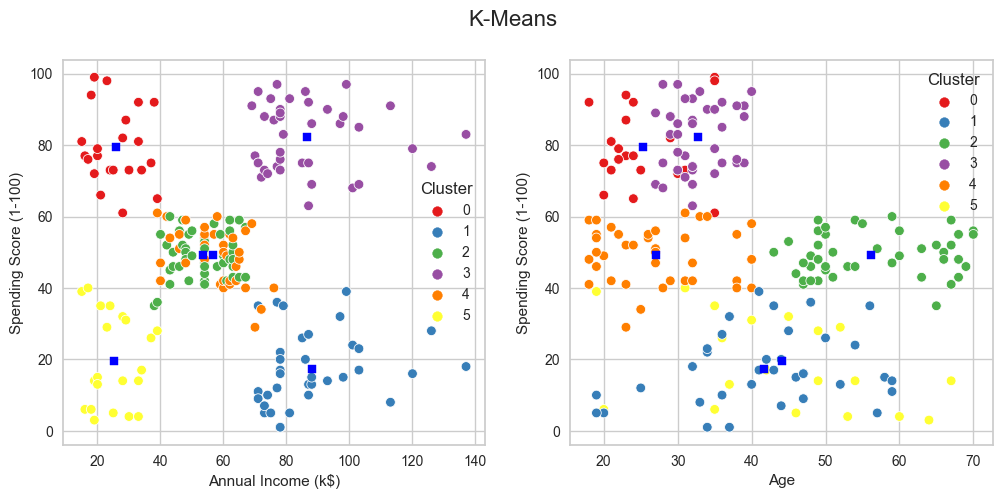

In [66]:
fig11.suptitle('K-Means', fontsize=16)
fig11

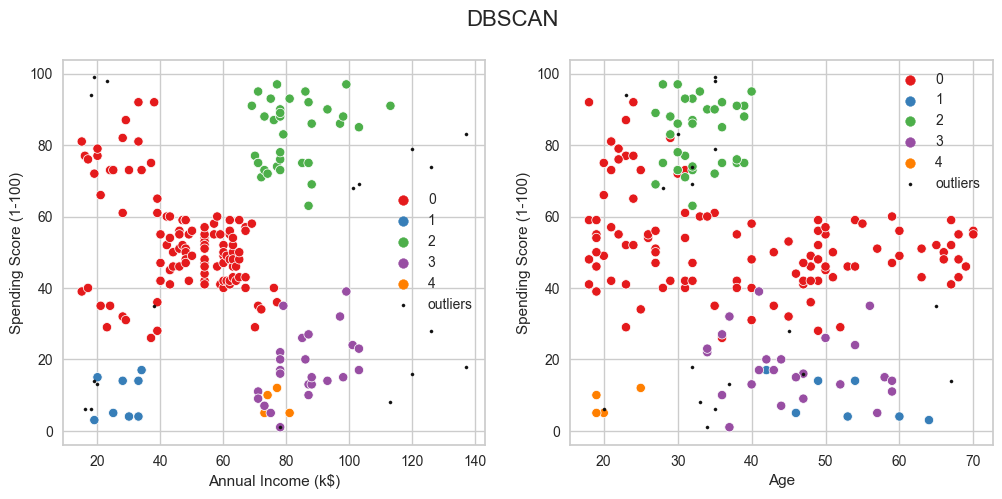

In [67]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

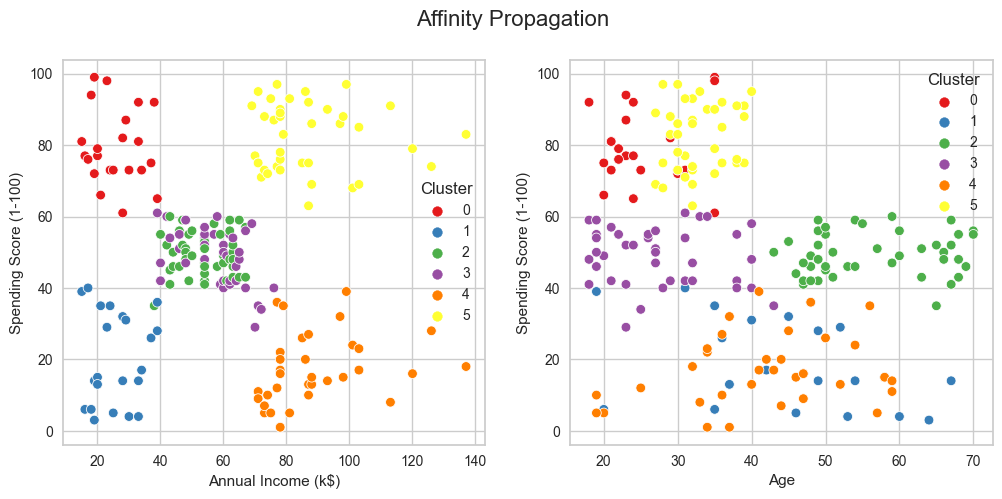

In [68]:
fig3.suptitle('Affinity Propagation', fontsize=16)
fig3

아래 표는 생성된 군집별 사이즈를 보여준다. 각 방법에서의 군집 넘버가 다른 것을 주의하자.

In [69]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes],axis=1, sort=False)
clusters

,KM_size,DBSCAN_size,AF_size
Cluster,,,
0,22.0,112.0,22.0
1,35.0,8.0,22.0
2,45.0,34.0,44.0
3,39.0,24.0,39.0
4,38.0,4.0,34.0
5,21.0,NaN,39.0
-1,NaN,18.0,NaN


위의 비교로 보아, DBSCAN의 군집화는 비교적 좋지 않다고 볼 수 있다. 이는 DBSCAN이 밀집도에 기반하기 때문이라고 할 수 있다. 만약 한 군집이 밀도가 낮다면 DBSCAN은 이것을 군집으로 인식하지 못할 것이다. 따라서 K-Means 와 Affinity Propagation을 통해 6개의 군집을 만들어냈다.